# Aprendizaje supervisado - Regresión Logística
***

La regresión logística es un tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica(una variable que puede adoptar un número limitado de categorías) en función de las variables independientes o predictoras. En general, es útil para modelar la probabilidad de un evento ocurriendo como función de otros factores [Wikipedia].

Para hacer esto, se usa una función logística sobre $z=\mathbf{w}^{\top}\mathbf{x}$, tal que la salida de la función logística especifica la probabilidad del evento positivo.

![Regresión Logística](imagenes/RegresionLogística.jpg)

## 2. Funcionamiento
***

La probabilidad de que cierta muestra pertenezca a una clase particular, que es el objeto de nuestro interés,  es la forma inversa de la función *logit*. Esta función es llamada *función logística* o *sigmoid*, y se define como:

$$\phi(z)=\frac{1}{1+e^{-z}}$$

En este caso $z$ es la red de entrada, i.e., la combinación lineal de l os pesos y las características, $z=\mathbf{w}^{\top}\mathbf{x}$. 


In [ ]:
%matplotlib inline

import numpy as np    #Para el manejo de arreglos
import pandas as pd   #Para el manejo de conjuntos de datos, tratados como tablas
import seaborn as sns #Para la construcción y visualización de gráficos
import matplotlib.pyplot as plt #Pra la construcción de gráficos

from sklearn.linear_model import LinearRegression # Regresion lineal teórica
from sklearn.linear_model import SGDRegressor #Regregsión lineal uando gradiente descendente estocástico
from sklearn import metrics #Las métricas de rendimiento de un clasificador
from sklearn import model_selection #Para el particionamiento de los conjuntos de datos
from sklearn import datasets #Conjuntos de datos predefinidos en sklearn

##########

import math
from sklearn.preprocessing import StandardScaler #Para escalar los datos
from sklearn.linear_model import LogisticRegression #Implementación de la regresión logística


## 3. Un ejercicio de clasificación con Regresión Logística: Iris
***

Como ejemplo, usemos un conjunto de datos simple: Iris. Este conjunto de datos contiene las mediciones realizadas sobre tres especies diferentes de lirios. Por lo tanto, la tarea consiste en determinar la especie de lirio dadas las medidiones.

![Iris](http://terpconnect.umd.edu/~petersd/666/html/iris_with_labels.jpg)

Las mediones de cada flor en el conjunto de datos son:

    - Longitud del sépalo en cm
    - Ancho del sépalo en cm
    - Longitud del pétalo en cm
    - Ancho del pétalo en cm

Clases objetivo para predecir:

    - Iris Setosa - Clase 0
    - Iris Versicolour - Clase 1
    - Iris Virginica - Clase 2


### 3.1  Lectura del conjunto de datos

Empezamos cargando el dataset, el cual se está disponible Sklearn:

In [12]:
#Cargamos el conjunto de datos
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [13]:
#Separamos la matriz de datos y el vector de etiquetas
X = iris.data
y = iris.target

# Obtenemos los nombres de las características
Xn = iris.feature_names

# Obtenemos los nombres de las clases
clases = iris.target_names

# Número de muestras y de características
n_samples, n_features = X.shape

# Visualicemos la matriz de datos y el vector
print("Número de Objetos: ", n_samples)
print("Número de Características: ", n_features)
print (y.shape)

Número de Objetos:  150
Número de Características:  4
(150,)


### 3.2 Exploración del conjunto de datos

In [14]:
# Visualicemos la información de las primeras 5 muestras
print("Primeras 5 muestras:")
print(Xn)
print(X[:5,:])

Primeras 5 muestras:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


Visualicemos las características del conjunto de datos. Para esto nos toca construir un DataFrame el cual usaremos con seaborn para hacer la visualización.

In [15]:
y.shape

(150,)

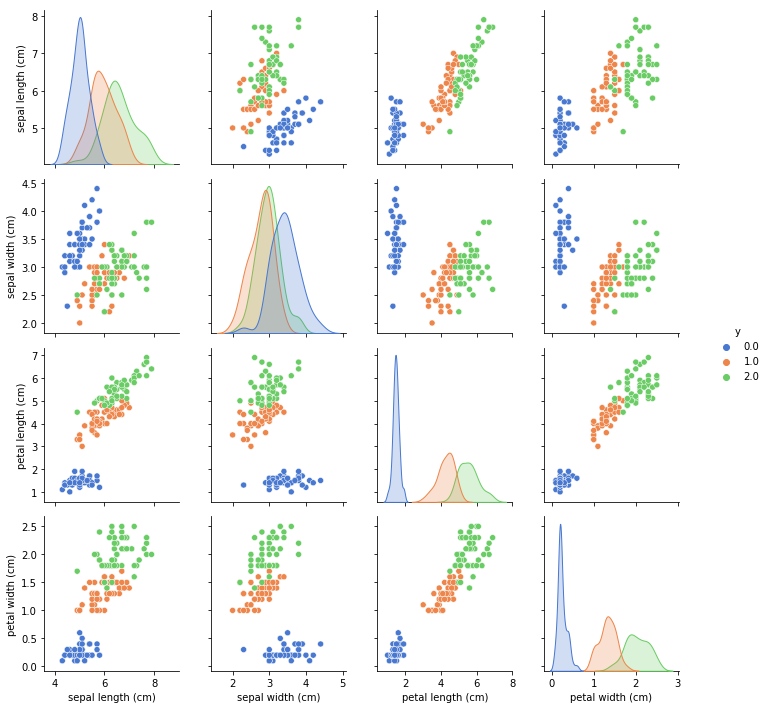

In [16]:
# Empezamos juntando el vector de etiquetas al conjunto de datos
temp = np.hstack((X,y[:,None]))

# Craemos una estructura llamada DataFrame con los datos y los nombres de las características
df = pd.DataFrame(data=temp, columns=np.hstack((Xn, ['y'])))
                  
# Usamos el paquete seaborn para visualizar las características
sns.pairplot(df, vars=Xn, diag_kind='kde', hue="y", palette="muted")


### 3.3 Preprocesamiento de los datos

Con base en la visuaización vemos que solo son necesarias 2 características para clasificar el conjunto de datos, así que eliminamos las 2 primeras. Después, procedemos a particionar el conjunto usando el 70% de los datos para entrenamiento y 30% para probar el modelo que se genera. Además, normalizamos los datos usando el conjunto de entrenamiento.

In [17]:
#Seleccionamos las 2 últimas características
X = iris.data[:,[2,3]]

#Dividimos el conjunto de datos en 2
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

#Normalizamos los datos removiendo la media y haciendo la varianza igual a 1
#OJO: La normalización se hace sobre el conjunto de entrenamiento
scl = StandardScaler()
scl.fit(X_train)

#Con los parámetros de normalización, normalizamos los dos conjuntos de datos
X_train_std = scl.transform(X_train)
X_test_std = scl.transform(X_test)

#X_combined_std = np.vstack((X_train_std,X_test_std))
#y_combined = np.hstack((y_train,y_test))

### 3.4 Entrenamiento del modelo

Ahora procedemos a entrenar el clasificador de regresión logística.

In [29]:
#Especifiamos el modelo a usar
clasificador = LogisticRegression(C=1, random_state = 0) #Valores pequeños de C especifican mayor regularización

#Entrenamos el modelo
clasificador.fit(X_train_std, y_train)

LogisticRegression(C=1, random_state=0)

### 3.5 Validación del modelo

Ahora determinamos que tan bueno es el modelo usando la precisión (accuracy) sobre el conjunto de datos de test.

In [30]:
#Hacemos las predicciones sobre el conjunto de test
y_pred = clasificador.predict(X_test_std)

#Mostramos la cantidad de muestras mal clasificadas 
print('Las muestras mal clasificadas fueron %d' % (y_test != y_pred).sum())

Las muestras mal clasificadas fueron 2


In [31]:
#Ahora podemos calcular y ver la precisión del clasificador
acc = metrics.accuracy_score(y_test, y_pred)
mat = metrics.confusion_matrix(y_test, y_pred)

print ("Exactitud del clasificador: %.2f " %(acc*100) )
print ("\nMatriz de Confusión: \n", mat)

Precisión del clasificador: 95.56 

Matriz de Confusión: 
 [[16  0  0]
 [ 0 17  1]
 [ 0  1 10]]


### 3.6 Viusualización de la superficie de decisión

Cómo al final estamos trabajando sólo con 2 características, podemos usar un plano para ver las fronteras de decisión entre las clases. La función escrita abajo no permite hacer esto. 

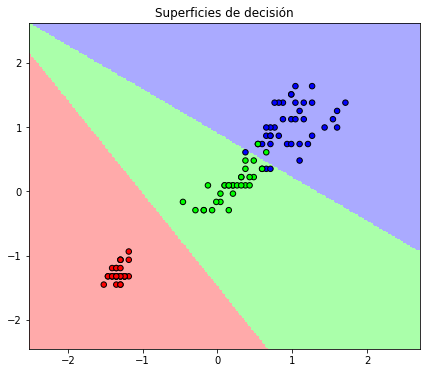

In [32]:
from matplotlib.colors import ListedColormap

def visualizar_clasificador(clf, X, y):
    # Grafiquemos las superficies de decisión
    h = .02  # step size in the mesh

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(7,6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=30)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Superficies de decisión")

    plt.show()
    
visualizar_clasificador(clasificador, X_train_std, y_train)